In [1]:
import numpy as np
from skimage import io, color, img_as_float
from IPython.display import display, Image

In [2]:
# Function to normalize an image
def normalize_image(im):
    im_res = im - np.min(im)
    return (1 / np.max(im_res)) * im_res

# Function to normalize columns
def norm_columns(f, x):
    return f(x) / np.sum(f(x), axis=0)

# Function to normalize rows
def norm_rows(f, x):
    return f(x) / np.sum(f(x), axis=1)[:, np.newaxis] # it would be nice to understand this better

In [3]:
jetplane = io.imread("https://raw.githubusercontent.com/JuliaImages/TestImages.jl/images/images/jetplane.tif")

TiffTag 338: 999 is not a valid EXTRASAMPLE


In [4]:
import cv2

In [7]:
type(jetplane[0,0,0])

numpy.uint8

In [8]:
jetplane.shape

(512, 512, 2)

In [16]:
jetplane[0,5,1]

255

In [17]:
jetplane_2d = jetplane[:,:,0]

In [20]:
cv2.imwrite('jetplane_cv2.png', jetplane_2d)

True

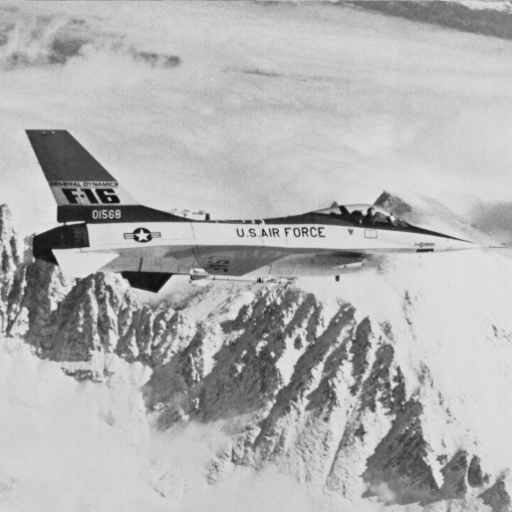

In [21]:
display(Image(filename="jetplane_cv2.png"))

In [24]:
mandrill = io.imread("https://raw.githubusercontent.com/JuliaImages/TestImages.jl/images/images/mandrill.tiff")

In [25]:
mandrill.shape

(512, 512, 3)

In [26]:
mandrill[0,0,0]

164

In [27]:
type(mandrill[0,0,0])

numpy.uint8

In [28]:
cv2.imwrite('mandrill_cv2.png', mandrill)

True

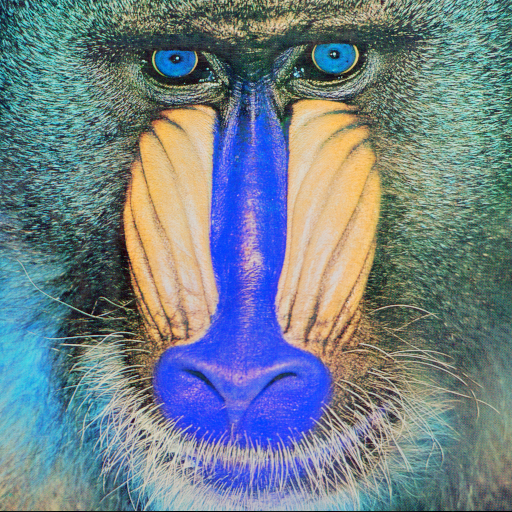

In [29]:
# not quite what we were looking for :-)
display(Image(filename="mandrill_cv2.png"))

In [30]:
mandrill[0,0,1]

150

In [31]:
mandrill[0,0,2]

71

In [32]:
cv2.imwrite('mandrill_cv2.jpg', mandrill)

True

In [33]:
# GPT-4 says: When you use OpenCV's cv2.imwrite() function to save an image, the color channels are assumed 
# to be in the order of Blue, Green, and Red (BGR), rather than the Red, Green, and Blue (RGB) order you might expect. 
# This is a peculiarity of the OpenCV library, which originated from a time when BGR was the standard due to 
# hardware constraints.

# If your mandrill NumPy array is in the RGB format and you save it with cv2.imwrite(), 
# the Red and Blue channels will be switched in the output image, making it appear as if 
# the red component is lost or altered.

# To fix this, you'll need to swap the Red and Blue channels before saving the image.

# Swap Red and Blue channels
mandrill_bgr = mandrill[:, :, ::-1]

In [34]:
cv2.imwrite('mandrill_bgr_cv2.png', mandrill_bgr)

True

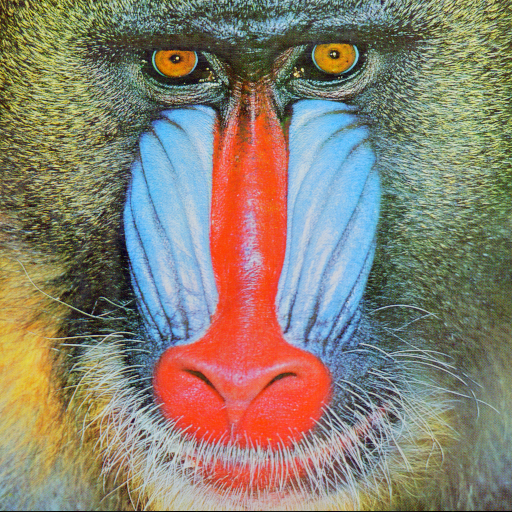

In [35]:
# that's more like it
display(Image(filename="mandrill_bgr_cv2.png"))

In [36]:
m = img_as_float(color.rgb2gray(mandrill))

In [37]:
m.shape

(512, 512)

In [38]:
type(m[0,0])

numpy.float64

In [39]:
m[0,0]

0.5775650980392157

In [42]:
m_uint8 = (m * 255).astype(np.uint8)
cv2.imwrite('mandrill_gray_cv2.png', m_uint8)

True

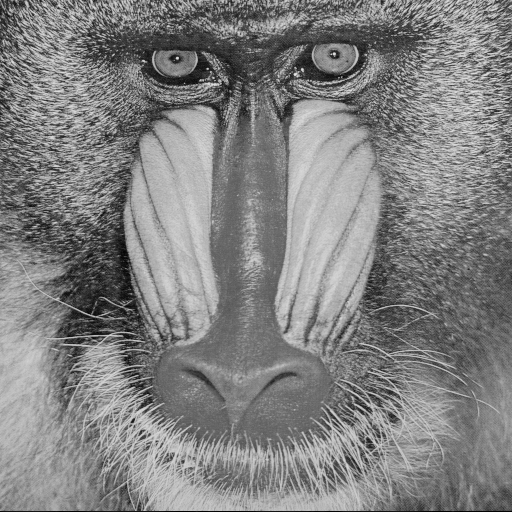

In [43]:
display(Image(filename="mandrill_gray_cv2.png"))

In [44]:
j = img_as_float(jetplane_2d)

In [45]:
j[0,0]

0.7568627450980392

In [46]:
j.shape

(512, 512)

In [47]:
t_m = np.transpose(m)

In [48]:
t_m_uint8 = (t_m * 255).astype(np.uint8)
cv2.imwrite('t_mandrill_gray_cv2.png', t_m_uint8)

True

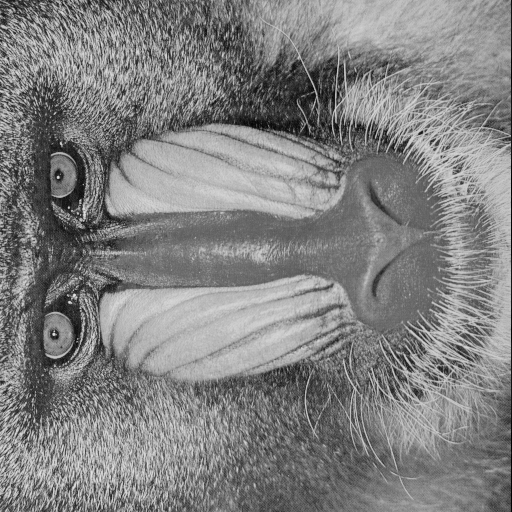

In [49]:
display(Image(filename="t_mandrill_gray_cv2.png"))

In [50]:
t_m_m = normalize_image(np.dot(t_m, m))

In [52]:
t_m_m_uint8 = (t_m_m * 255).astype(np.uint8)
cv2.imwrite('product_mandrill_gray_cv2.png', t_m_m_uint8)

True

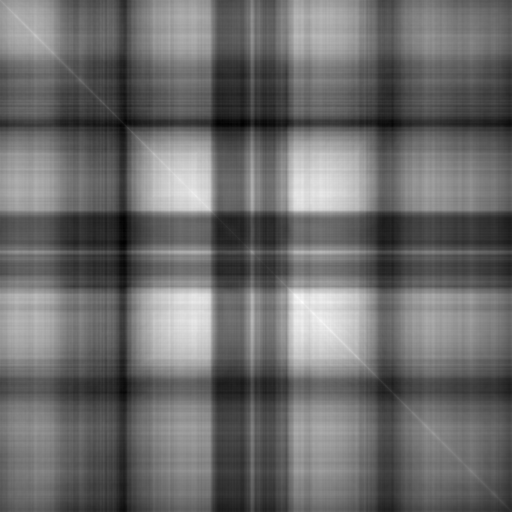

In [53]:
display(Image(filename="product_mandrill_gray_cv2.png"))

In [54]:
# Python is more crisp here compared to Julia

# I wonder if this is because I am using float64 here, as opposed to float32 in Julia... 

In [55]:
nc_m = normalize_image(norm_columns(lambda x: x + 1, m))

In [56]:
nc_m_uint8 = (nc_m * 255).astype(np.uint8)
cv2.imwrite('nc_mandrill_gray_cv2.png', nc_m_uint8)

True

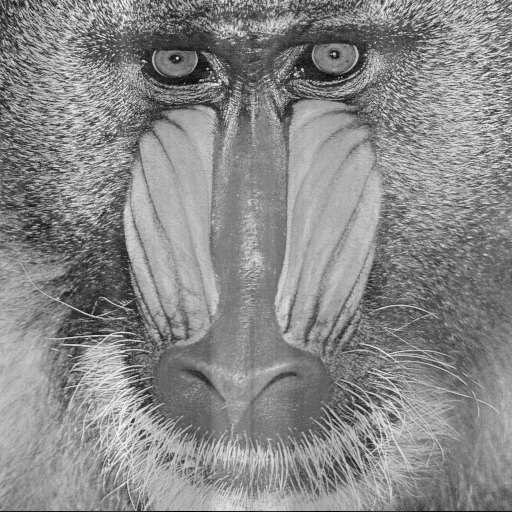

In [57]:
display(Image(filename="nc_mandrill_gray_cv2.png"))

In [58]:
t_nc_m_nc_m = normalize_image(np.dot(np.transpose(nc_m), nc_m))

In [59]:
t_nc_m_nc_m_uint8 = (t_nc_m_nc_m * 255).astype(np.uint8)
cv2.imwrite('product_nc_mandrill_gray_cv2.png', t_nc_m_nc_m_uint8)

True

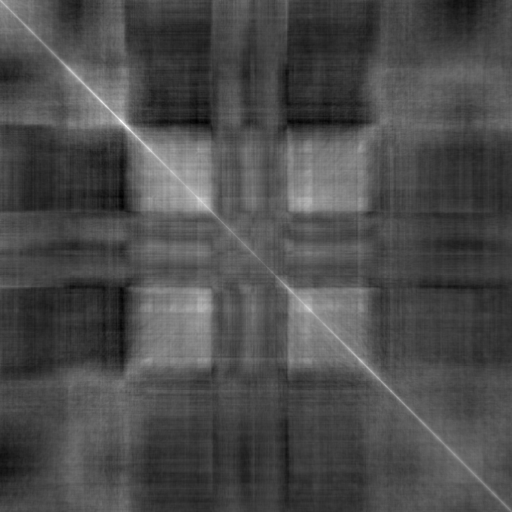

In [61]:
display(Image(filename="product_nc_mandrill_gray_cv2.png"))

In [62]:
# even money in crispness here between Python and Julia, but there are mild differences

# I wonder if this is because I am using float64 here, as opposed to float32 in Julia... 

In [65]:
nr_j = normalize_image(norm_rows(lambda x: x + 1, j))

In [67]:
nr_j_uint8 = (nr_j * 255).astype(np.uint8)
cv2.imwrite('nr_jetplane_gray_cv2.png', nr_j_uint8)

True

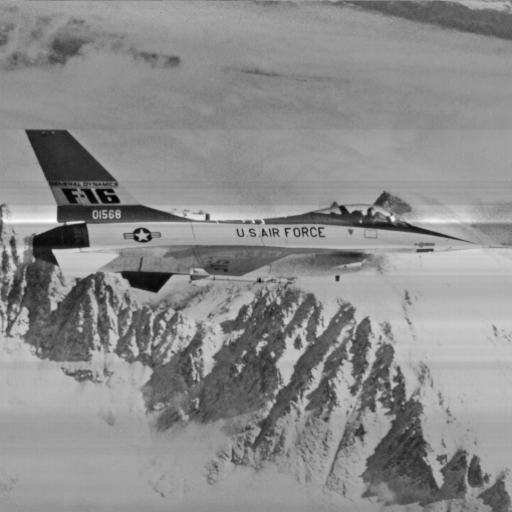

In [68]:
display(Image(filename="nr_jetplane_gray_cv2.png"))

In [69]:
# this Python image is indistinguishable from the equivalent Julia image 
# (so it's on the stage of matrix product when the difference happens)

In [70]:
j_m = normalize_image(np.dot(j, m))

In [71]:
j_m_uint8 = (j_m * 255).astype(np.uint8)
cv2.imwrite('product_jetplane_mandrill_gray_cv2.png', j_m_uint8)

True

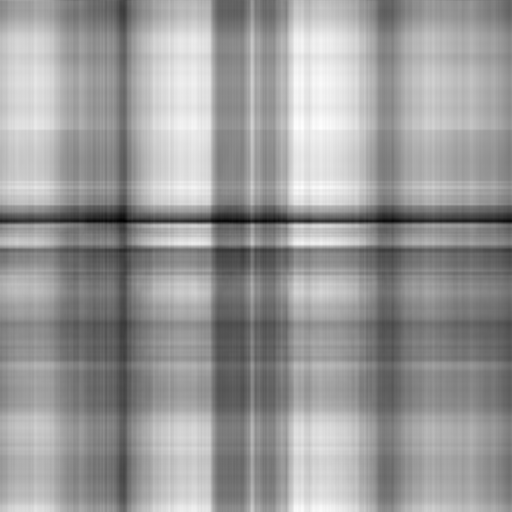

In [72]:
display(Image(filename="product_jetplane_mandrill_gray_cv2.png"))

In [73]:
# Python is more crisp here compared to Julia

# I wonder if this is because I am using float64 here, as opposed to float32 in Julia... 

In [75]:
nr_j_nc_m = normalize_image(np.dot(nr_j, nc_m))

In [76]:
nr_j_nc_m_uint8 = (nr_j_nc_m * 255).astype(np.uint8)
cv2.imwrite('product_normalized_jetplane_mandrill_gray_cv2.png', nr_j_nc_m_uint8)

True

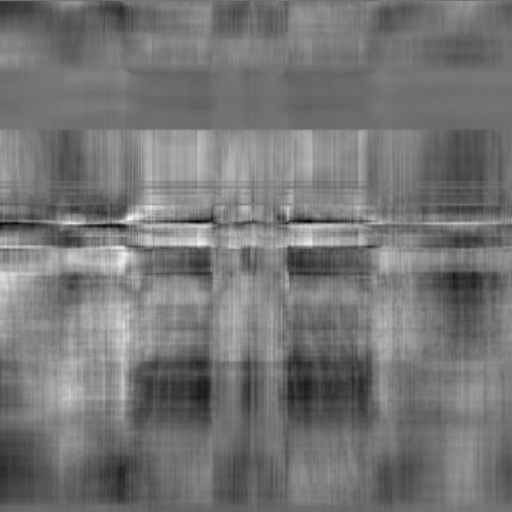

In [77]:
display(Image(filename="product_normalized_jetplane_mandrill_gray_cv2.png"))

In [78]:
# even money in crispness here between Python and Julia, but there are mild differences

# I wonder if this is because I am using float64 here, as opposed to float32 in Julia... 